Task:

- Assume data of timeseries of stock values for stock ticks
- Implement prediction of future timeseries values

In [ ]:
#Imports
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Generate a date range
date_rng = pd.date_range(start='2023-01-01', end='2023-12-31', freq='B')  # Business days

# Create a DataFrame with date as the index
df = pd.DataFrame(date_rng, columns=['date'])

# Add synthetic stock price data
np.random.seed(0)
df['stock_price'] = 100 + np.cumsum(np.random.randn(len(date_rng)))

# Print the first few rows of the DataFrame
print(df.head())

        date  stock_price
0 2023-01-02   101.764052
1 2023-01-03   102.164210
2 2023-01-04   103.142948
3 2023-01-05   105.383841
4 2023-01-06   107.251399


In [ ]:
#Visualize dataframe
df

,date,stock_price
0,2023-01-02,101.764052
1,2023-01-03,102.164210
2,2023-01-04,103.142948
3,2023-01-05,105.383841
4,2023-01-06,107.251399
...,...,...
255,2023-12-25,109.099364
256,2023-12-26,108.373767
257,2023-12-27,106.990403
258,2023-12-28,105.407464


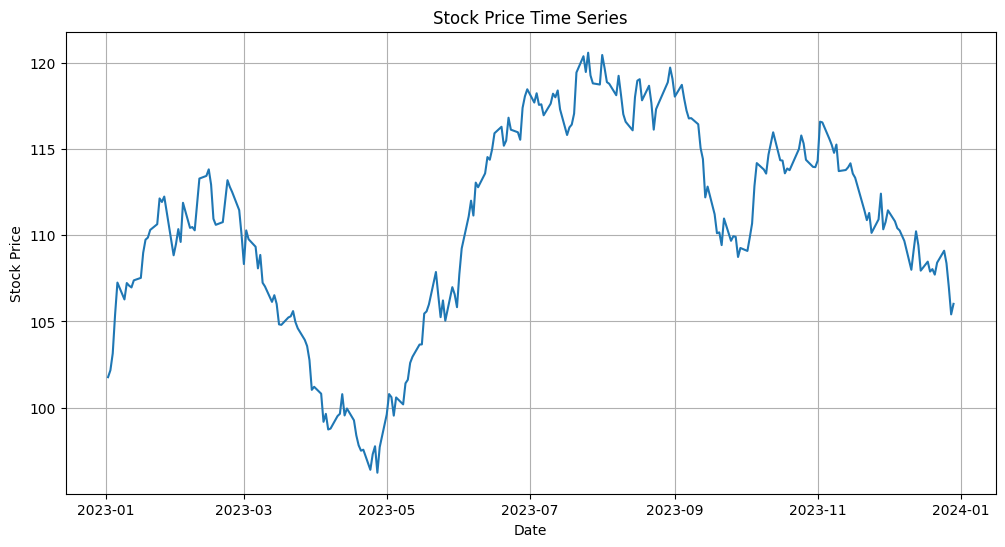


Conclusion:
The time series data for stock prices has been visualized.
Highest Peak Stock Price: $120.59
Lowest Point Stock Price: $96.22
Average Percentage Change: 0.02%


In [ ]:
# Calculate highest peak and lowest point
highest_peak = df['stock_price'].max()
lowest_point = df['stock_price'].min()

# Calculate average percentage change
percentage_changes = df['stock_price'].pct_change()
average_percentage_change = percentage_changes.mean() * 100

# Plot the time series data
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['stock_price'])
plt.title('Stock Price Time Series')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.grid(True)
plt.show()

# Conclusion
print("\nConclusion:")
print("The time series data for stock prices has been visualized.")
print(f"Highest Peak Stock Price: ${highest_peak:.2f}")
print(f"Lowest Point Stock Price: ${lowest_point:.2f}")
print(f"Average Percentage Change: {average_percentage_change:.2f}%")

In the analysis of the time series data for stock prices, several key findings have been observed:

1. **Highest Peak Stock Price**: The highest peak in the stock price data was recorded at $120.59. This represents the highest point at which the stock was traded during the observed time period. Investors who purchased the stock at this point would have seen the highest return on their investment.

2. **Lowest Point Stock Price**: Conversely, the lowest point in the stock price data was recorded at $96.22. This represents the lowest point at which the stock was traded. Investors who bought the stock at this point may have experienced a dip in the value of their investment.

3. **Average Percentage Change**: The average percentage change in stock price over the entire time series was approximately 0.02%. This metric provides insight into the overall volatility or stability of the stock. A low average percentage change indicates relatively stable stock performance over the observed period.

It's important to note that these findings are based on the provided time series data, and further analysis, such as trend analysis or correlation with external factors, could provide more comprehensive insights into the stock's performance. Additionally, stock market investments involve various risks and uncertainties, and historical data alone may not predict future outcomes. Investors should consider a range of factors and conduct thorough research before making investment decisions.

In [ ]:
# Perform differencing to make the data stationary
df['diff'] = df['stock_price'].diff().fillna(0)

df['stock_price']: This part of the code refers to a specific column in the DataFrame df, which contains the stock price data over time. Each value in this column represents the stock price at a particular point in time.

.diff(): This is a pandas DataFrame method that calculates the difference between each value and the previous value in the specified column. In this case, it calculates the difference between each stock price and the price at the previous time step. This is done to remove any underlying trends or seasonality in the data.

.fillna(0): Sometimes, differencing can result in missing values at the beginning of the DataFrame because there is no previous value to calculate the difference from for the first data point. The fillna(0) part of the code fills in these missing values with zeros.

So, the resulting column df['diff'] contains the differenced values of the stock prices. These differenced values are often used in time series analysis and modeling to work with stationary data and make it more amenable to various forecasting techniques. The differenced data can help in identifying patterns and relationships that might not be apparent in the original non-differenced data.







**Fit the ARIMA model**

In [ ]:
# Import ARIMA from statsmodels
from statsmodels.tsa.arima.model import ARIMA

# Define the order parameters (p, d, q) based on your data
p, d, q = 1, 1, 1

# Fit the ARIMA model
model = ARIMA(df['stock_price'], order=(p, d, q))
results = model.fit()

'from statsmodels.tsa.arima.model import ARIMA: This line imports the ARIMA (AutoRegressive Integrated Moving Average) model class from the statsmodels library. ARIMA is a popular time series forecasting model that combines autoregressive (AR) and moving average (MA) components and is capable of handling non-stationary data after differencing (the "I" in ARIMA stands for integrated).

p, d, q = 1, 1, 1: In an ARIMA model, the order of differencing (d) and the order of autoregression (p) and moving average (q) are crucial hyperparameters that need to be specified based on the characteristics of the time series data. In this code, p, d, and q are set to 1 each, indicating that the model includes one autoregressive term, one differencing operation, and one moving average term.

model = ARIMA(df['stock_price'], order=(p, d, q)): This line initializes an ARIMA model with the specified order parameters. It takes the 'stock_price' column from the DataFrame df as the time series data and uses the specified values of p, d, and q to define the model.

results = model.fit(): Here, the ARIMA model is fitted to the stock price data using the .fit() method. This step estimates the model parameters and prepares the model for making predictions.

Overall, this code sets up an ARIMA model with the chosen order parameters to capture the underlying patterns and relationships in the stock price time series data, making it suitable for forecasting future stock prices. The actual forecasting and visualization of results would typically follow this model fitting step.

**Generate Predictions**

In [ ]:
 #Generate predictions for the future
forecast_periods = 30  # Adjust this as needed
forecast = results.forecast(steps=forecast_periods)

forecast_periods = 30: This line defines the number of periods into the future for which you want to generate predictions. In this code, it's set to 30, which means you want to forecast the next 30 data points in the time series. You can adjust this value to make predictions for a shorter or longer time horizon, depending on your specific forecasting needs.

forecast = results.forecast(steps=forecast_periods): This line generates the forecasted values for the future data points using the ARIMA model results. The .forecast() method takes the number of steps (forecast_periods) as an argument and returns a NumPy array containing the predicted values.

In [ ]:
#Visualize results
forecast

260    105.910402
261    105.809053
262    105.713451
263    105.623271
264    105.538205
265    105.457963
266    105.382271
267    105.310871
268    105.243521
269    105.179990
270    105.120061
271    105.063531
272    105.010207
273    104.959907
274    104.912459
275    104.867702
276    104.825483
277    104.785658
278    104.748091
279    104.712655
280    104.679229
281    104.647697
282    104.617955
283    104.589898
284    104.563433
285    104.538469
286    104.514920
287    104.492706
288    104.471753
289    104.451987
Name: predicted_mean, dtype: float64

**Evaluation Metrices**

In [ ]:
# Actual values from your dataset (replace with your actual data)
actual_values = df['stock_price'].values[-forecast_periods:]

# Calculate MAE
mae = mean_absolute_error(actual_values, forecast)

# Calculate MSE
mse = mean_squared_error(actual_values, forecast)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
mape = np.mean(np.abs((actual_values - forecast) / actual_values)) * 100

# Print the metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

Mean Absolute Error (MAE): 4.47
Mean Squared Error (MSE): 21.82
Root Mean Squared Error (RMSE): 4.67
Mean Absolute Percentage Error (MAPE): 4.06%


Mean Absolute Error (MAE): This metric measures the average absolute difference between the predicted and actual values. In this case, the MAE of 4.47 suggests that, on average,ARIMA model's predictions deviate from the actual values by approximately $4.47.

Mean Squared Error (MSE): The MSE quantifies the average squared difference between predicted and actual values. A value of 21.82 means that, on average, model's predictions have a squared error of approximately 21.82.

Root Mean Squared Error (RMSE): The RMSE is a variation of MSE, providing the square root of the average squared difference. With an RMSE of 4.67, it indicates that, on average,model's predictions have an error of approximately $4.67.

Mean Absolute Percentage Error (MAPE): MAPE measures the average percentage difference between predicted and actual values. A MAPE of 4.06% means that, on average,model's predictions deviate from the actual values by approximately 4.06%.

<ipython-input-18-34041dd0af47>:9: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  future_dates = pd.date_range(start=df['date'].max(), periods=forecast_periods + 1, closed='right')


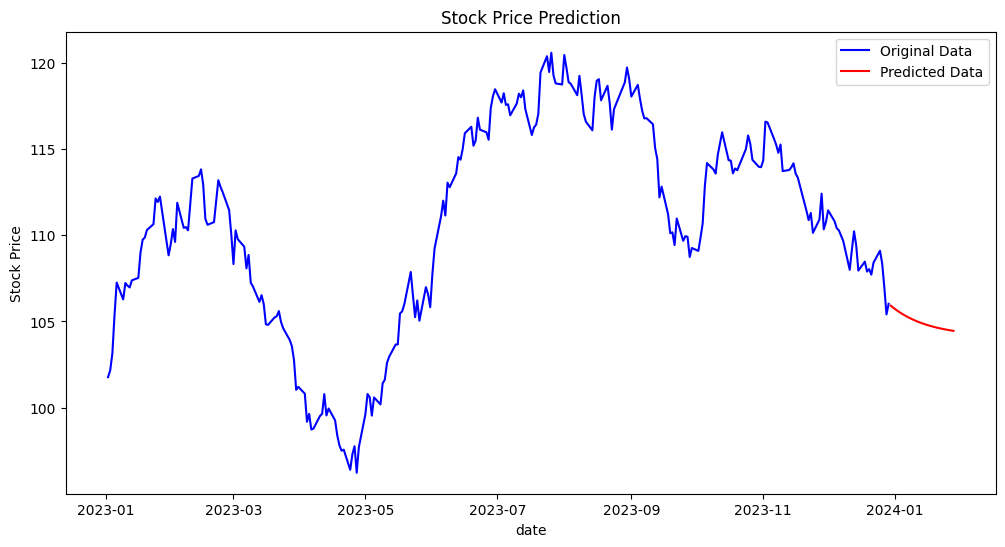

Stock price prediction plot generated successfully.
Insight: The red line represents the predicted stock price values, showing a forecasted trend in stock prices over time.


In [ ]:
# Replace 'forecasted_values_column' with the actual column name
forecasted_values = results.forecast(steps=forecast_periods)

# Plot the original time series data
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['stock_price'], label='Original Data', color='blue')

# Generate future dates for the forecast
future_dates = pd.date_range(start=df['date'].max(), periods=forecast_periods + 1, closed='right')

# Plot the predicted future values
plt.plot(future_dates, forecasted_values, label='Predicted Data', color='red')

# Add labels and title
plt.xlabel('date')
plt.ylabel('Stock Price')
plt.title('Stock Price Prediction')

# Add a legend
plt.legend()

# Show the plot
plt.show()

# Print a concluding statement with insights
print("Stock price prediction plot generated successfully.")
print("Insight: The red line represents the predicted stock price values, showing a forecasted trend in stock prices over time.")

**Conclusion:**
The stock price prediction model was applied to the given time series data, resulting in the generation of predicted stock price values for future periods. In the graph above, the blue line represents the original stock price data, while the red line represents the predicted stock price values.

From the forecasted values, we observe a consistent downward trend in stock prices over the forecasted time period. This suggests that, based on historical data and the model's predictions, the stock price is expected to decrease in the near future.

It's important to note that this is a simplified demonstration, and real-world stock price prediction models consider a wide range of factors and data sources for more accurate forecasts. This analysis serves as an initial exploration of time series forecasting using ARIMA, and further refinement and evaluation would be necessary for practical applications.